In [1]:
# install the following packages if needed
# pip install praw pandas nltk matplotlib nltk

In [5]:
import praw
import pandas as pd
import datetime as dt
import numpy as np
from my_reddit import *

# reddit = praw.Reddit(client_id='your_client_id', \
#                      client_secret='your_client_secret', \
#                      user_agent='your_user_agend')

def load_posts(posts):
    return_df = pd.DataFrame([
        vars(post)
        for post in posts
    ])
    return return_df

In [6]:
sub = "BreedingMaterial"

In [7]:
df = pd.DataFrame(load_posts(reddit.subreddit(sub).new(limit=1000)))

In [12]:
import datetime

print("oldest post: ", datetime.datetime.fromtimestamp(df.created_utc.min()))
print("newest post: ", datetime.datetime.fromtimestamp(df.created_utc.max()))

oldest post:  2020-12-15 13:02:26
newest post:  2020-12-17 15:12:48


In [13]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /home/jup/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/jup/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /home/jup/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/jup/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/jup/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/jup/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /home/j

True

In [14]:
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

class WordCloudGeneration:
    def preprocessing(self, data):
        # convert all words to lowercase
        data = [item.lower() for item in data]
        # load the stop_words of english
        stop_words = set(stopwords.words('english'))
        # concatenate all the data with spaces.
        paragraph = ' '.join(data)
        # tokenize the paragraph using the inbuilt tokenizer
        word_tokens = word_tokenize(paragraph) 
        # filter words present in stopwords list 
        preprocessed_data = ' '.join([word for word in word_tokens if not word in stop_words])
#         print("\n Preprocessed Data: " ,preprocessed_data)
        return preprocessed_data

    def create_word_cloud(self, final_data):
        # initiate WordCloud object with parameters width, height, maximum font size and background color
        # call the generate method of WordCloud class to generate an image
        wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color="black").generate(final_data)
        # plt the image generated by WordCloud class
        plt.figure(figsize=(20,10))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout()
        plt.savefig('wordcloud.png')
        plt.show()

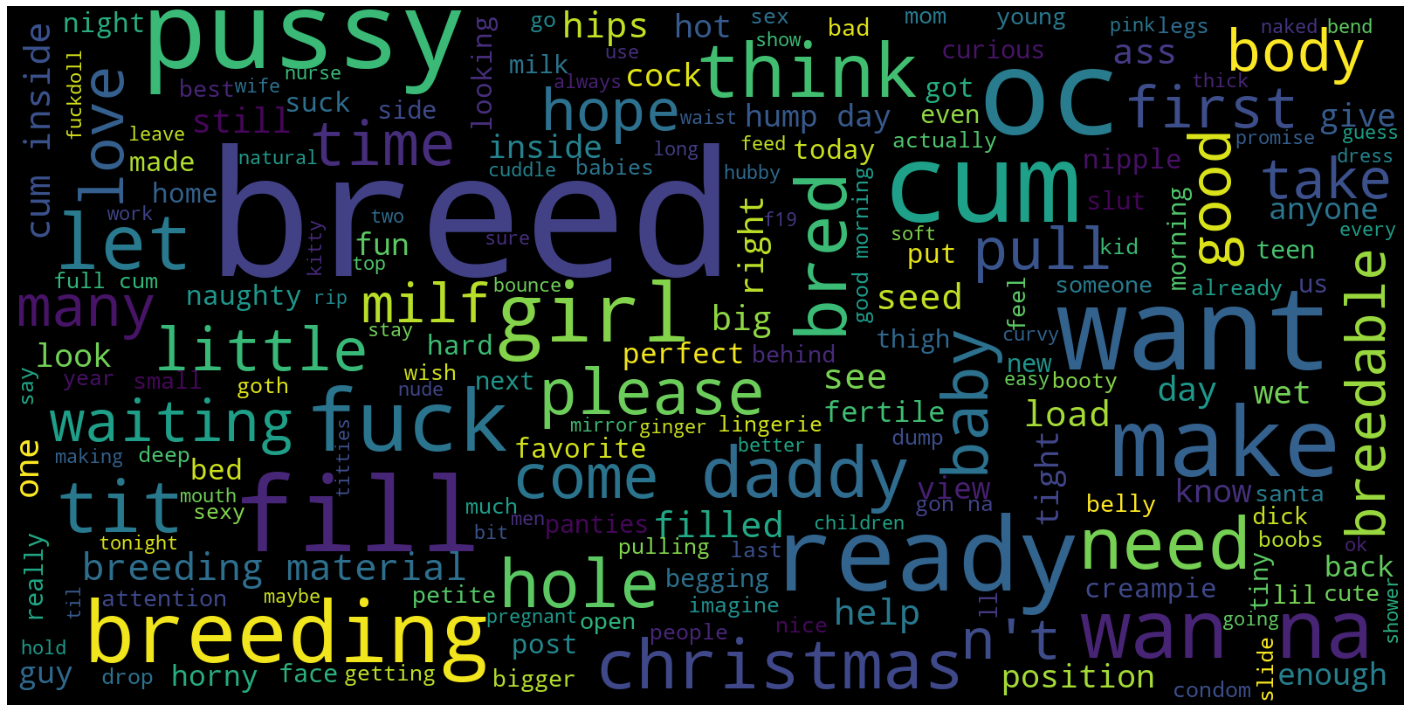

In [15]:
wordcloud_generator = WordCloudGeneration()
clean_data = wordcloud_generator.preprocessing(df.title)
wordcloud_generator.create_word_cloud(clean_data)